In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Practice 3_data1.csv')
display(df.head())
df2 = pd.read_csv('Practice 2_data1.csv')
display(df2.head())

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


,Time,s2,s5,s6
0,12:25:00,3,0,15
1,12:26:00,3,0,63
2,12:27:00,1,7,5
3,12:28:00,5,3,11
4,12:29:00,0,0,0


# Stationarity

#### Stationarity is “a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations,” and the statistical properties of the time series do not change.

## Dickey-Fuller Test for Stationarity
### S2

In [11]:
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('Practice 3_data1.csv', header=0, index_col=0, squeeze=True)
X = series.s2
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.297673
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### S5

In [14]:
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('Practice 2_data1.csv', header=0, index_col=0, squeeze=True)
X = series.s5
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.684756
p-value: 0.004333
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


### S6

In [12]:
df2 = pd.read_csv('Practice 2_data1.csv')
#display(df2.head())

from statsmodels.tsa.stattools import adfuller
data = df2.s6
result2 = adfuller(data)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.624011
p-value: 0.005318
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


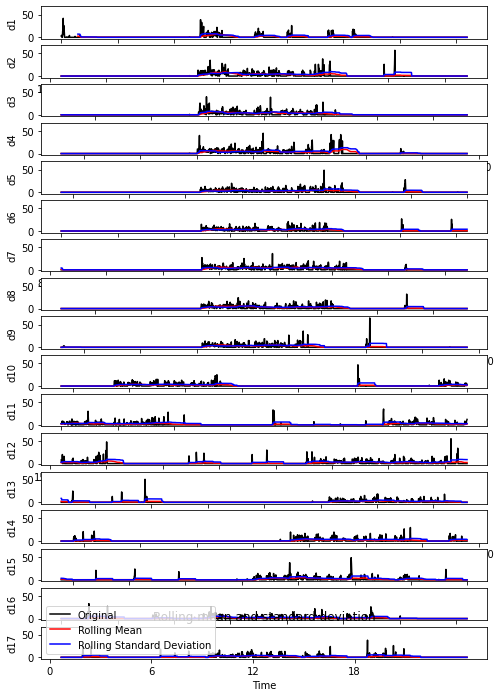

In [21]:
min_day = 1440
df['time_min'] = range(0, len(df.index))

rmean=df.s2.rolling(window=60).mean()
rstd=df.s2.rolling(window=60).std()

a = len(df.index)
b = a//min_day
fig, axs = plt.subplots(b-1, 1, figsize = (8,12), sharey = True)

for i in range(0,b-1):
    axs[i].plot(df.time_min[min_day*i:min_day*(i + 1)], df.s2[min_day*i:min_day*(i + 1)], c = 'black', label = 'Original')
    axs[i].plot(df.time_min[min_day*i:min_day*(i + 1)], rmean[min_day*i:min_day*(i + 1)] , color='red',label='Rolling Mean')
    axs[i].plot(df.time_min[min_day*i:min_day*(i + 1)], rstd[min_day*i:min_day*(i + 1)], color='blue',label = 'Rolling Standard Deviation')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('d' + str(i+1))
    
plt.setp(axs[b-2], xticks=[23000, 23360, 23720, 24080], xticklabels = ['0', '6', '12', '18'])
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show()

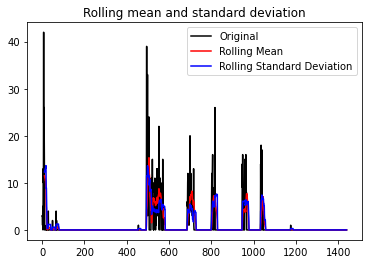

In [20]:
min_day = 1440
rmean=df.s2[0:min_day].rolling(window=12).mean()
rstd=df.s2[0:min_day].rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(df.s2[0:min_day], color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show()

## Correlation and Autocorrelation

#### Autocorrelation is determining the relationships between the elements of a time series and others from the same series separated from them by a given interval in order to predict a trend in that data. 

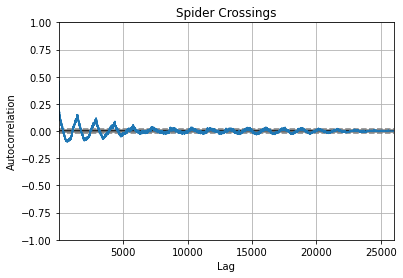

In [4]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.s2)
plt.title('Spider Crossings');

plt.show()

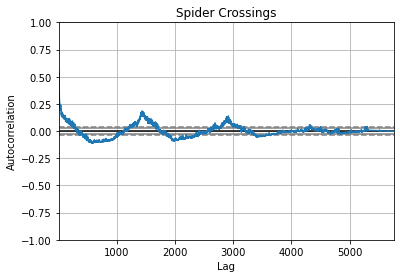

In [27]:
min_day = 1440
autocorrelation_plot(df.s2[0:min_day * 4])
plt.title('Spider Crossings');

plt.show()

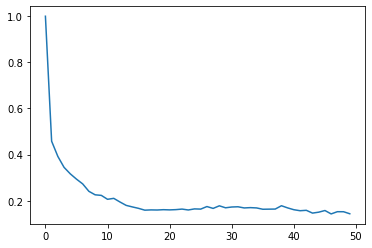

In [26]:
def acf(x, length=50):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

plt.plot(range(0,50), acf(df.s2))

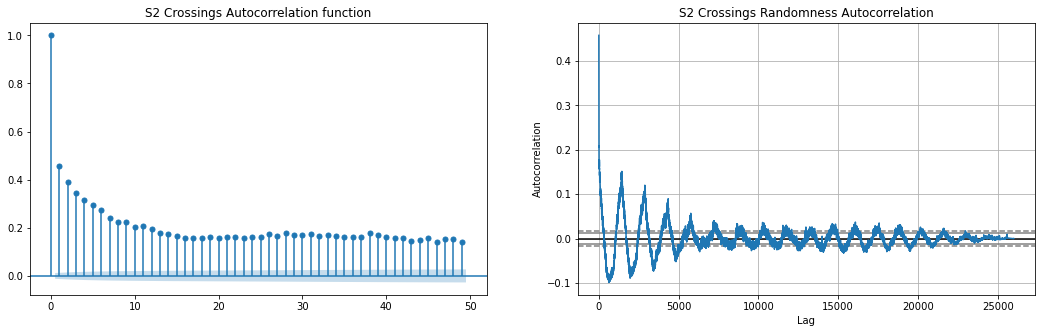

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
#f3.tight_layout()

plot_acf(df.s2, ax=ax1, lags =  range(0,50))
ax1.set_title('S2 Crossings Autocorrelation function')

autocorrelation_plot(df.s2, ax=ax2)
ax2.set_title('S2 Crossings Randomness Autocorrelation')

#plot_acf(series3, ax=ax3, lags = range(0, 5))     # note that max lags is 35
#ax3.set_title('shampoo-sales')

plt.show()